<a href="https://colab.research.google.com/github/Arfan2203/DAA-HANDS-ON-2/blob/main/benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CPU: 1 physical cores, 2 logical cores
Memory: svmem(total=13609422848, available=12250685440, percent=10.0, used=1023746048, free=7345467392, active=698204160, inactive=5202223104, buffers=395976704, cached=4844232704, shared=1601536, slab=247918592)


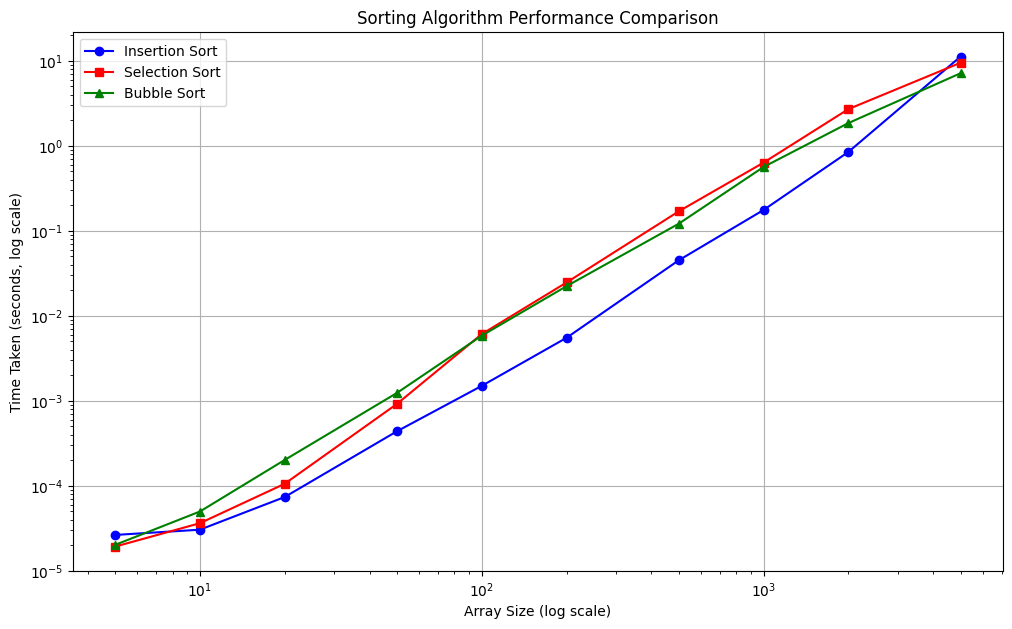

In [1]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import psutil

def selection_sort(arr):
    """Sort an array using the selection sort algorithm."""
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

def bubble_sort(arr):
    """Sort an array using the bubble sort algorithm."""
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break  # Optimization: Stop if no swaps occurred

def insertion_sort(arr):
    """Sort an array using the insertion sort algorithm."""
    for i in range(1, len(arr)):
        current_value = arr[i]
        position = i
        while position > 0 and arr[position - 1] > current_value:
            arr[position] = arr[position - 1]
            position -= 1
        arr[position] = current_value

def benchmark_sorting_algorithm(sort_function, sizes):
    """Benchmark the provided sorting function across different array sizes."""
    results = []
    for size in sizes:
        array = np.random.randint(0, 10000, size)  # Create an array with random integers
        array_copy = np.copy(array)  # Make a copy to avoid altering the original array
        start_time = timeit.default_timer()
        sort_function(array_copy)
        end_time = timeit.default_timer()
        duration = end_time - start_time
        results.append(duration)
    return results

def print_system_specs():
    """Display CPU and memory specifications."""
    cpu_details = f"CPU: {psutil.cpu_count(logical=False)} physical cores, {psutil.cpu_count(logical=True)} logical cores"
    memory_details = f"Memory: {psutil.virtual_memory()}"
    print(cpu_details)
    print(memory_details)

def plot_benchmark_results(sizes, insertion_times, selection_times, bubble_times):
    """Plot the benchmark results for different sorting algorithms."""
    plt.figure(figsize=(12, 7))
    plt.plot(sizes, insertion_times, label='Insertion Sort', marker='o', linestyle='-', color='b')
    plt.plot(sizes, selection_times, label='Selection Sort', marker='s', linestyle='-', color='r')
    plt.plot(sizes, bubble_times, label='Bubble Sort', marker='^', linestyle='-', color='g')
    plt.xscale('log')  # Log scale for the x-axis
    plt.yscale('log')  # Log scale for the y-axis
    plt.xlabel('Array Size (log scale)')
    plt.ylabel('Time Taken (seconds, log scale)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define input sizes for the benchmark
array_sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

# Run benchmarks for each sorting algorithm
insertion_sort_times = benchmark_sorting_algorithm(insertion_sort, array_sizes)
selection_sort_times = benchmark_sorting_algorithm(selection_sort, array_sizes)
bubble_sort_times = benchmark_sorting_algorithm(bubble_sort, array_sizes)

# Print system specifications
print_system_specs()

# Plot the benchmark results
plot_benchmark_results(array_sizes, insertion_sort_times, selection_sort_times, bubble_sort_times)

